## Decision Trees
*Problem* : **Titanic Survior Prediction** Kaggle Challenge

### Learning Goals
- How to pre-process data? 
    - Dropping not useful features
    - Filling the missing values (Data Imputation)
    
- Creating a Binary Decision Tree from Scratch


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("titanic.csv")

In [4]:
data.head()  ## by default it shows top 5 examples

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## PassengerId, Name, TicketId, Cabin, Embarked are not really useful.
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]
data_clean = data.drop(columns_to_drop,axis=1)  # by default drop() deletes a whole row as axis=0
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  ## create object
data_clean["Sex"] = le.fit_transform(data_clean["Sex"]) # convert string data to numeric data
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [11]:
data_clean = data_clean.fillna(data_clean["Age"].mean())  ## fill mean of "Age" col

In [24]:
# Imputer --> Sklearn!

In [12]:
data_clean.loc[1]  ## to show 2nd row

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [14]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)
print(type(X), type(Y))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


### Decision Tree Implementation from Scratch:
- There are 2 most common methods: "gini index" method and other is "entropy" method.
- We will implement with entropy method. 

In [16]:
col = np.array([1,1,1,1,0,0])
counts = np.unique(col,return_counts=True)
counts

(array([0, 1]), array([2, 4]))

In [17]:
def entropy(col): ## this function finds entropy of a column
    counts = np.unique(col,return_counts=True) #counts[0] is unique values and counts[1] is counts
    m = float(col.shape[0])  ## total number of examples in a column
    
    ent = 0.0
    for i in counts[1]:
        p  = i/m   ## prob is counts_for_ith_unique_class/total_number_of_examples
        ent += (p*np.log2(p))
    
    return (-1)*ent
## as entropy is - summation(pi. log(pi)). So multiply by -1 in the end

In [19]:
col1 = np.array([1,1,1,1,0,0])
col2 = np.array([1,1,1,0,0,0])
col3 = np.array([1,1,1,1,1,1])
print(entropy(col1), entropy(col2), entropy(col3))

0.9182958340544896 1.0 -0.0


In [20]:
def divide_data(x_data,fkey,fval):  
    #Work with Pandas Data Frames (initialize empty dataframes with columns same as x_data)
    x_right = pd.DataFrame([],columns=x_data.columns) 
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):  ## iterate over all examples
        val = x_data[fkey].loc[i]  ## use 'loc' to access df indices
        
        if val > fval:  ## if value of 'fkey' column in ith iteration > fval, then add in right
            x_right = x_right.append(x_data.loc[i])  ## appned whole row in right df
        else:
            x_left = x_left.append(x_data.loc[i])   ## else appned whole row in left df
            
    return x_left,x_right

In [22]:
x_left,x_right = divide_data(data_clean[:8],'Sex',0.5)  ## let us pass 1st 8 data_points
print(x_left)
print(x_right)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [23]:
def information_gain(x_data,fkey,fval):    
    left,right = divide_data(x_data,fkey,fval)
    
    #below gives us % of total samples that are on left and right
    l = float(left.shape[0])/x_data.shape[0]  ## examples_in_left / total_examples
    r = float(right.shape[0])/x_data.shape[0]  ## examples_in_right / total_examples
    
# If All examples come to one side! means we can't split anymore. So there will be no info gained
# We can definitely not choose this feature. So return -infinity
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 # Min Information Gain
    
    # IG(S, A) = H(S) - ( |S1|/|S|*H(S1) + |S2|/|S|*H(S2)
    # we've already calculated  |S1|/|S|=l and |S1|/|S|=r
    # entropy(for S) is entropy(for 'label') and (S1 and S2) are left and right arrays after dividing w.r.t 'fkey' col.
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [24]:
# Test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [28]:
class DecisionTree:    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None ## to store left node
        self.right = None # to store right node 
        self.fkey = None # about which feature we will divide
        self.fval = None # threshold val to divide data in 2 sets
        self.max_depth = max_depth # to stop overfitting
        self.depth = depth # depth of the node
        self.target = None # to store prediction at a particular node
## eg- if S is divided in S1 and S2 and there are 50examples in S1 from which 40/50 are Yes(label)
## then self.target = Yes for node S1. Similarly we can use self.target to store pred at a node.
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []  ## to store info_gain of w.r.t to all features.
        
        for i in features:  # iterate over all features to calculate Info_Gain
            i_gain = information_gain(X_train,i,X_train[i].mean()) # IG for ith col and fval=mean()
            info_gains.append(i_gain)
            
        ## our key at root node is column with maximum info_gain
        self.fkey = features[np.argmax(info_gains)] 
        self.fval = X_train[self.fkey].mean()
        print("Making Tree. Features is: ",self.fkey)
        
        #Split Data w.r.t 'fkey' which has maximum info_gain
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
## if we have 5examples with index 0,1,2,3,4 and after diving S1: 0,3 and S2: 1,2,4
# Then reset_index() starts index from 0 for both sets as S1: 0,1 and S2: 0,1,2 
         
        #Truly a leaf node(when one side is empty). So predict now as we've reached the end 
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5 :  # yes=1 and no=0 ,so survived.mean()>0.5 means 1
                self.target = "Survive"  ## if survived.mean() >= 0.5 means P(survive) >0.5
            else:
                self.target = "Dead"
            return
        # if end(leaf node) is not reached, then stop if max_depth is reached and predict output
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        ## These above were base cases

        #Now let us define Recursive Case to apply same algo on left and right nodes
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth) #Create constructer 
# for recursive case first and then call fit() method and depth of child =depth of paresnt + 1.
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth) # depth inc by 1
        self.right.train(data_right)
        
## Earlier we predicted results only when reached leaf node or max_depth. But You can set the
# target at every node. If leaf_node or max_depth is not reached, then target is set here for every node. 
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):  ## define function to predict results now
        if test[self.fkey]>self.fval: # if test_data > fval, then goto right node else in left
            #go to right
            if self.right is None: # if right child does not exist then return target at this point
                return self.target
            return self.right.predict(test)  ## else goto right node to predict if right is not None
        else:  ## if test_data < fval, then goto left node
            if self.left is None: # if left node_does not exist, then return target at this point
                return self.target
            return self.left.predict(test)  ## else goto left_node to predict

### Train-Validation-Test Set Split

In [29]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [30]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [31]:
dt = DecisionTree()

In [32]:
dt.train(train_data)

Making Tree. Features is:  Sex
Making Tree. Features is:  Pclass
Making Tree. Features is:  Age
Making Tree. Features is:  SibSp
Making Tree. Features is:  Pclass
Making Tree. Features is:  Age
Making Tree. Features is:  Age
Making Tree. Features is:  SibSp
Making Tree. Features is:  Parch
Making Tree. Features is:  Pclass
Making Tree. Features is:  SibSp
Making Tree. Features is:  Fare
Making Tree. Features is:  Parch
Making Tree. Features is:  Age
Making Tree. Features is:  Pclass
Making Tree. Features is:  Age
Making Tree. Features is:  Age
Making Tree. Features is:  Parch
Making Tree. Features is:  SibSp
Making Tree. Features is:  Fare
Making Tree. Features is:  Age
Making Tree. Features is:  Age
Making Tree. Features is:  Fare
Making Tree. Features is:  Age
Making Tree. Features is:  Age
Making Tree. Features is:  Fare
Making Tree. Features is:  Age
Making Tree. Features is:  Parch
Making Tree. Features is:  Fare
Making Tree. Features is:  Fare
Making Tree. Features is:  Fare
Maki

In [33]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [36]:
## make predictions
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [46]:
print(y_pred)

['Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Survive', 'Dead', 'Survive', 'Survive', 'Dead', 'Dead', 'Survive', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 

In [48]:
y_actual = test_data[output_cols]
y_actual.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [52]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [54]:
y_actual = np.array(y_actual)
y_pred = y_pred.reshape((-1,1)) ## change from (268,) --> (268,1) to match with y_actual
acc = np.mean(y_pred == y_actual)

In [56]:
print(acc)

0.8171641791044776


## Decision Tree using Sklearn

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [59]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [60]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [61]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [62]:
sk_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(max_depth=5)

In [63]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

- So accuracy is almost same for both 

## Visualise a Decison Tree
- We can visualize our decision tree with help of below libraries

`pip install pydotplus`


In [77]:
import pydotplus

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [78]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)
## out_file= sends output to dot_data object and rounded=True makes rounded nodes in output

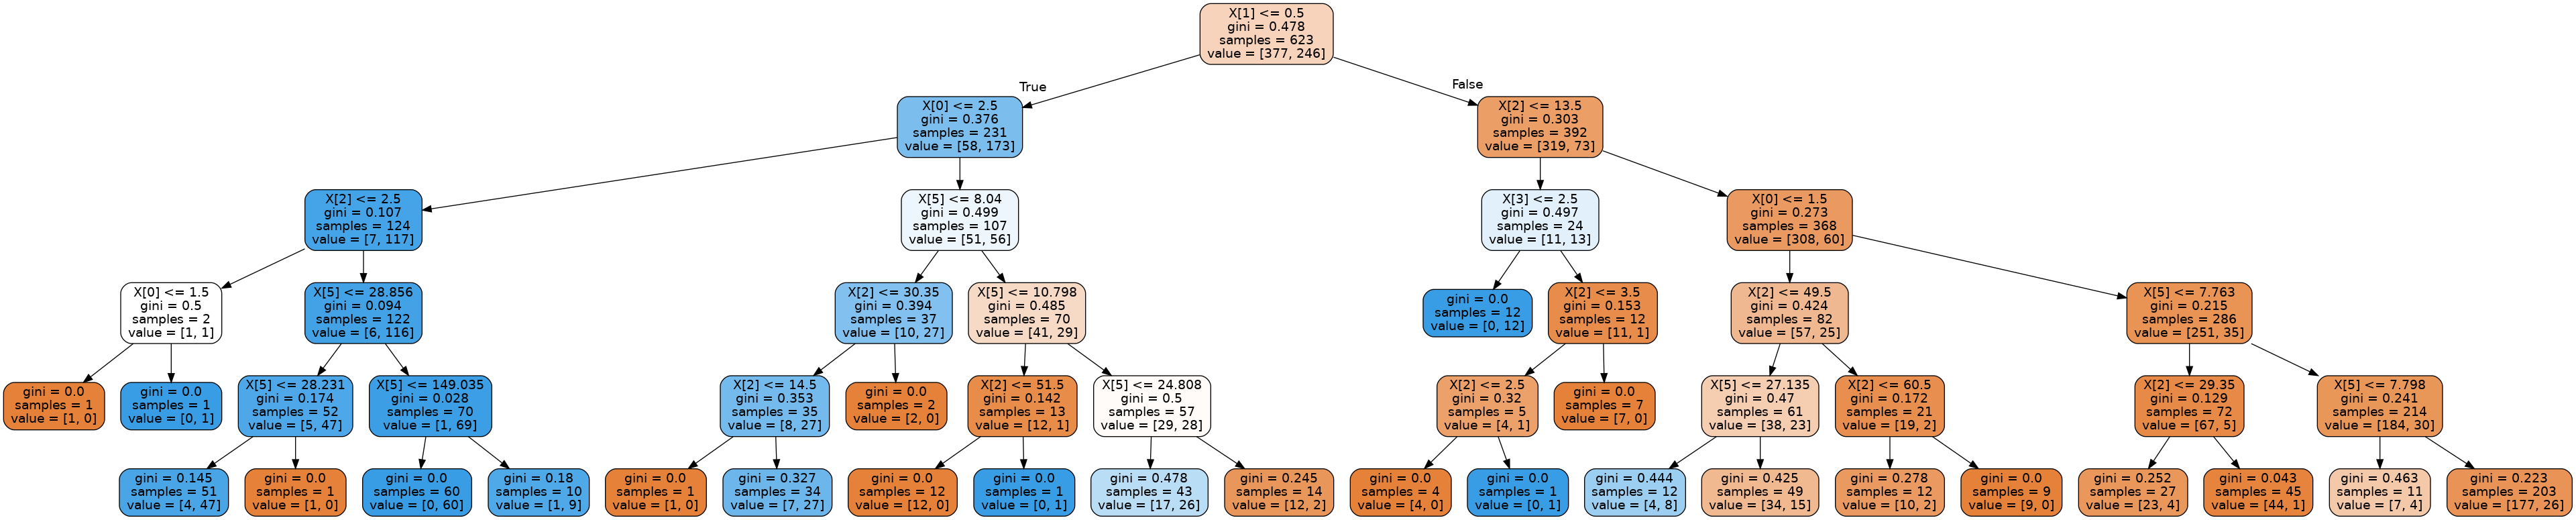

In [80]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  ## create graoh or image
## call graph_from_dot_data() method and getvale() is used to get value from dot_data
Image(graph.create_png())

- We can see now: at every point fkey, fval, entropy, samples, value are given where val=[no_of_sample_in_left, no_of_samples_in_right]

### Overfitting:
- Let us see overfitting practically

In [82]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))


In [83]:
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [84]:
sk_tree.score(X_test,Y_test)

0.7873134328358209

In [85]:
## let us see results now by passing max_depth=5
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(X_train,Y_train)
print(sk_tree.score(X_train,Y_train))
print(sk_tree.score(X_test,Y_test))

0.8443017656500803
0.8283582089552238


## Random Forests
- To solve problems of trees: we generate a lot of trees instead of 1 tree and chose the best tree. This process is called Random Forests.

#### Ensembling Techinique:
- In Ensembling, we chose multiple trees to make predictions with different splits of training set and result are predicted on all of these trees. Final prediction is majority voting or average of these results which is also same. 

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [101]:
rf.fit(X_train,Y_train)  ## do the training 

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [104]:
rf.score(X_train,Y_train)

0.8507223113964687

In [105]:
rf.score(X_test,Y_test)

0.832089552238806

In [106]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [107]:
print(acc)

0.8201677419354839


In [109]:
## let us check accuracies for different values of no_of_trees
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [110]:
print(acc_list)

[0.7096516129032258, 0.7608903225806453, 0.7881032258064515, 0.812232258064516, 0.8105806451612902, 0.7849419354838709, 0.8106064516129032, 0.7913161290322581, 0.8058451612903227, 0.8056645161290323, 0.7961806451612903, 0.8169935483870969, 0.8202064516129031, 0.8169806451612903, 0.8169806451612903, 0.8153677419354839, 0.8153419354838709, 0.8025161290322579, 0.8186064516129032, 0.8074064516129033, 0.8153677419354839, 0.8121419354838709, 0.8217935483870967, 0.7961032258064515, 0.8186193548387097, 0.8218064516129033, 0.8169677419354837, 0.8073290322580645, 0.8298064516129033, 0.8089290322580645, 0.8170064516129031, 0.8201677419354839, 0.8153806451612903, 0.8137290322580645, 0.8185419354838709, 0.8169806451612903, 0.8169677419354837, 0.8121548387096773, 0.8218064516129033, 0.8105419354838709, 0.8153548387096775, 0.8218064516129033, 0.8185548387096773, 0.8282064516129033, 0.8201677419354839, 0.8217935483870967, 0.8105290322580645, 0.8153161290322581, 0.8169806451612903]


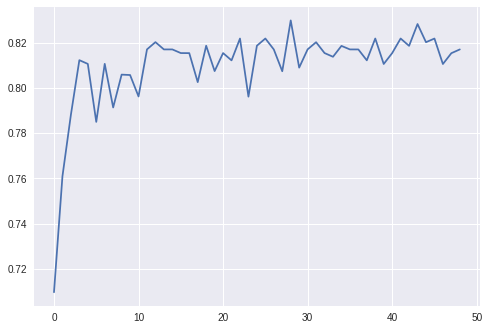

In [111]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [112]:
print(np.argmax(acc_list))

28


In [113]:
rf = RandomForestClassifier(n_estimators=np.argmax(acc_list),max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=28)

In [114]:
rf.score(X_train,Y_train)

0.869983948635634

In [115]:
rf.score(X_test,Y_test)

0.8432835820895522

- These are the best results.